TUMOR ANALYSIS - ENTIRE MESH

This notebook is used to divide in a specific number of REV the mesh network for the entire tumor geometry given as input, to compute the upscaled parameters and to solve the final coupled problem.

In [1]:
import time
from scipy.sparse import *
from dolfin import *
from block import *
from xii import *
import numpy as np
import matplotlib.pyplot as plt
import auxiliary_functions as aux
from scipy.sparse.linalg import *
from petsc4py import PETSc
from scipy.spatial import Delaunay



/home/fra/miniconda3/envs/tesi2/lib/python3.11/site-packages/block/__init__.py:15: UserWarning: The cbc.block repository has moved to https://github.com/blocknics/cbc.block
  warnings.warn('The cbc.block repository has moved to https://github.com/blocknics/cbc.block', UserWarning)


Missing HsMG for fract norm computing


Mesh import

In [2]:
meshQ = Mesh()

mesh_name='cancer_mesh.xdmf'

with open('Tumor_mesh_total/ind_bound2.txt') as f:
    # storage
    ind_bound=[]
    count_lines = 0
    for line in f:  # read rest of lines
        riga = line.split()
        ind_bound.append(int(riga[0])-1)
        count_lines+=1
    ind_bound=np.array(ind_bound)
     
with XDMFFile('Tumor_mesh_total/'+mesh_name) as infile:

     infile.read(meshQ)
     
tol=1e-15
coord=meshQ.coordinates()

label_TOT = 555*np.ones(len(coord),)
label_TOT[ind_bound]=111

Q_markers = MeshFunction('size_t', meshQ, 0)

Q_markers.array()[:]=label_TOT

radii=np.load("Tumor_mesh_total/cancer_radii.npy")

REV division process and computation of the Upscaled Parameters

In [3]:
n_div_x=4
n_div_y=2
n_div_z=3
p_in =6000
p_out=2000

#print(radii)
radii_not_scaled=radii*1e-6


xmin=np.min(coord[:,0])
xmax=np.max(coord[:,0])
ymin=np.min(coord[:,1])
ymax=np.max(coord[:,1])
zmin=np.min(coord[:,2])
zmax=np.max(coord[:,2])


x= np.array([-1,-0.4, 0.32, 1])
y= np.array([-1, 0.2, 1])
z= np.array([-1,-0.49, 0.23,1])

dir_results = '/mnt/c/Users/franc/Desktop/TUMOR_TOTAL_NET'


K_x,K_y,K_z,C,mu_bl_up = aux.REV_division_TOTAL(meshQ,dir_results,Q_markers,radii_not_scaled,ind_bound,x,y,z,p_in,p_out)

(18093, 3)
(18093, 3)
-------------------- MESH INFO --------------------
Coordinates: (18093, 3)
Edges: (23949, 2)
RAdii: (23949,)
Labels: (18093,)
Interior Points: (15897,)
Boundary Points: (2196,)

-------------------- COMPUTING INTERSECTIONS --------------------
Coordinates with intersections: (19734, 3)
Edges with intersections: (25590, 2)
Labels with intersections: (19734,)
Radii with intersections: (25590,)

... COMPUTING K VALUES  ...

------------------------------------------------- DIRECTION: 1  -------------------------------------------------
-------------------------------------------------------------------------
REV = 1
Number of vertices: 383
Number of cells: 439
-------------------- SUBMESH INFO --------------------
Coordinates: (295, 3)
Edges: (337, 2)
Labels: (295,)
Inlet points submesh: 35
Outlet points submesh: 61
Number of vertices: 295
Number of cells: 337
Solving linear variational problem.
-3.7586629948714775e-13
-2.636861585549847e-13
3.403413752374319e-06
--

In [4]:
formatted_vector = ['{:.2e}'.format(value) for value in C]
float_vector = [float(value) for value in formatted_vector]
print(float_vector)

[3.4e-06, 7.92e-06, 8.53e-06, 1.92e-06, 9.57e-06, 3.5e-06, 9.94e-06, 1.07e-05, 1.26e-05, 1.8e-05, 2.94e-05, 1.56e-05, 2.23e-06, 3.92e-06, 6.01e-06, 8.71e-06, 1.56e-05, 5e-06]


In [5]:
formatted_vector = ['{:.2e}'.format(value) for value in K_x]
float_vector = [float(value) for value in formatted_vector]
print(float_vector)
formatted_vector = ['{:.2e}'.format(value) for value in K_y]
float_vector = [float(value) for value in formatted_vector]
print(float_vector)
formatted_vector = ['{:.2e}'.format(value) for value in K_z]
float_vector = [float(value) for value in formatted_vector]
print(float_vector)

[3.76e-13, 2.98e-13, 2.64e-13, 8.63e-13, 6.62e-13, 5.47e-13, 5.02e-13, 2.15e-13, 2.56e-13, 6.95e-13, 7.31e-13, 6.08e-13, 4.4e-13, 6.41e-14, 5.63e-14, 4.14e-13, 2.72e-13, 6.34e-14]
[2.27e-12, 6.39e-13, 9.3e-13, 2.15e-12, 7.28e-13, 4.12e-13, 1.76e-12, 5.94e-13, 3.82e-13, 3.71e-12, 6.56e-13, 7.8e-13, 1.07e-12, 9.25e-13, 7.49e-13, 1.5e-12, 5.13e-13, 5.66e-13]
[7.08e-13, 1.04e-13, 5.94e-14, 1.06e-12, 2.39e-13, 2.53e-13, 5.61e-13, 1.71e-13, 2.8e-14, 7.58e-13, 6.33e-13, 3.6e-13, 4.32e-13, 1.12e-13, 5.25e-14, 2.77e-13, 1.16e-13, 4.89e-14]


In [6]:
formatted_vector = ['{:.2e}'.format(value) for value in mu_bl_up]
float_vector = [float(value) for value in formatted_vector]
print(float_vector)

[0.00268, 0.00272, 0.00277, 0.0026, 0.00266, 0.00278, 0.00275, 0.00278, 0.00277, 0.00266, 0.00268, 0.00271, 0.00271, 0.00275, 0.00273, 0.00272, 0.00275, 0.00273]


Functions used to create the mesh and to build the problem

In [3]:
def get_mesh(name,ind_bound,n_div_x,n_div_y,n_div_z,x,y,z):
     ''' Function that creates the capillary and tissue meshes with respective boundary tags.
               INPUT:
                    name : name of the mesh.
                    n_div_x : number of division in the x direction.
                    n_div_y : number of division in the y direction.
                    n_div_z : number of division in the z direction.
                    x : delimiters in the x direction.
                    y : delimiters in the y direction.
                    z : delimiters in the z direction.



               OUTPUT:
                    meshV : cubic mesh of the region.
                    Q_markers : markers for the capillary boundary points.
                    V_markers : markers fot the tissue boundary points.
                    REV_markers_t : REV markers.


     '''
     #--------------------MESHES-------------------------

     #3D mesh Tissue mesh
     meshV = Mesh()

     mesh_name=name
     
     with XDMFFile("Tumor_mesh_total"+mesh_name+".xdmf") as infile:

          infile.read(meshV)
     
          
     coord_V=meshV.coordinates()
     labels_V = 555*np.ones(len(coord),)
     labels_V[ind_bound]=111

     V_markers = MeshFunction('size_t', meshV, 0)

     V_markers.array()[:]=labels_V

     file = XDMFFile(f"{dir_results}/FINAL_RESULTS/MARKERS/V_markers.xdmf")
     file.write(V_markers)

     REV_labels_t=aux.compute_REV_labels_TOTAL(meshV,n_div_x,n_div_y,n_div_z,x, y,z )

     REV_markers_t = MeshFunction('size_t', meshV, 0)


     #Per ogni punto della mesh del tessuto ho i tag da 1 a 8 che mi indicano a quale REV appartiene
     REV_markers_t.array()[:]=REV_labels_t
     #print(REV_labels_t)

     file2 = XDMFFile(f"{dir_results}/FINAL_RESULTS/MARKERS/REV_markers.xdmf")
     file2.write(REV_markers_t)

     #--------------------------------------------------
     
     coord_V=meshV.coordinates()

     fig = plt.figure(figsize=(8, 6))
     ax = fig.add_subplot(111, projection='3d')
     scatter_plot=ax.scatter(coord_V[:,0],coord_V[:,1],coord_V[:,2],c=REV_markers_t.array())
     cbar = fig.colorbar(scatter_plot, ax=ax, pad=0.1)
     plt.title("REV division markers")


     fig = plt.figure(figsize=(8, 6))
     ax = fig.add_subplot(111, projection='3d')
     scatter_plot=ax.scatter(coord_V[:,0],coord_V[:,1],coord_V[:,2],c=V_markers.array())
     cbar = fig.colorbar(scatter_plot, ax=ax, pad=0.1)
     plt.title('Boundary markers for the tissue mesh')
     

     #Measures

     ds = Measure('ds', domain=meshV)
     ds = ds(subdomain_data=V_markers)

     dst = Measure('ds', domain=meshV)
     dst = dst(subdomain_data=V_markers)


     dxtREV = Measure('dx', domain=meshV)
     dxtREV = dxtREV(subdomain_data=REV_markers_t)

     return meshV, Q_markers, V_markers, REV_markers_t

def get_system(meshV, K_x, K_y, K_z, C, mu_bl_up, beta_value,p0_value,x,y,z):
      ''' Function that assemble the matrices to solve the problem
          INPUT:
               meshV : mesh of the cubic geometry.
               K_x :  x components of the permeability tensor, one for each REV.
               K_y :  y components of the permeability tensor, one for each REV.
               K_z :  z components of the permeability tensor, one for each REV.
               C : RHS terms, one for each REV.
               mu_bl_up : upscaled blood viscosity terms, one for each REV.
               beta_value :  Neumann parameter fot the tissue.
               p0_value : initial reference pressure value for the tissue.
               x : delimiters in the x direction.
               y : delimiters in the y direction.
               z : delimiters in the z direction.

          OUTPUT:
               AD : stiffness matrix.
               M : mass matrix.
               b : RHS term
               W : space of the solutions.
               T : total matrix.
      
      '''
      #"""A, b, W, bcs"""


      # Spaces
      nRev=18
      #Q = FunctionSpace(meshQ, 'CG', 1)
      V = FunctionSpace(meshV, 'CG', 1)

      W = (V, V)

      pcap, pt = map(TrialFunction, W)
      qcap, qt= map(TestFunction, W)

      #----------------------------------------------------------
     
      #Parameters

      rho_bl = Constant(1030) #kg/m^3
      rho_int = Constant(1000) #kg/m^3
      mu_int= Constant(1.3*1e-3) #Pa * s
      k_t = Constant(1e-18) #m^2
      K_T=Constant(rho_int*k_t/mu_int)

      pi_p = Constant(3300)
      pi_int = Constant(666)
      p0 = Constant(p0_value)

      scaling=Constant(1)
      
      beta = Constant(beta_value)
      
      #-------------------------------------------------------------------

      class K(UserExpression):

        def __init__(self, mesh, REV_division, nRev, K_x, K_y, K_z, mu_bl_up,**kwargs):
                super().__init__()
                self.REV_division = REV_division
                self.nRev=nRev
                self.K_x = K_x
                self.K_y = K_y
                self.K_z = K_z
                self.mu_bl_up_x = mu_bl_up
                self.mu_bl_up_y = mu_bl_up
                self.mu_bl_up_z = mu_bl_up
                self.mesh=mesh

        def value_shape(self):
            return (3, 3)

        def eval(self, values, x):
            "Set value[0] to value at point x"
            tol = 1E-14
            for REV in range(self.nRev):

                xmin=self.REV_division[REV+1]['xmin']
                xmax=self.REV_division[REV+1]['xmax']
                ymin=self.REV_division[REV+1]['ymin']
                ymax=self.REV_division[REV+1]['ymax']
                zmin=self.REV_division[REV+1]['zmin']
                zmax=self.REV_division[REV+1]['zmax']
            
                if (((x[0]-xmin)>=-tol) and ((x[0]-xmax)<=tol) and ((x[1]-ymin)>=-tol) and ((x[1]-ymax)<=tol) and ((x[2]-zmin)>=-tol) and ((x[2]-zmax)<=tol)):
                    values[0] = self.K_x[REV] / self.mu_bl_up_x[REV]
                    values[1] = 0
                    values[2] = 0
                    values[3] = 0
                    values[4] = self.K_y[REV] / self.mu_bl_up_y[REV]
                    values[5] = 0
                    values[6] = 0
                    values[7] = 0
                    values[8] = self.K_z[REV] / self.mu_bl_up_z[REV]
                    break

      REV_division=aux.create_dictionary_TOTAL(meshV,x,y,z)
      kappa = K(meshV, REV_division,nRev, K_x,K_y,K_z,mu_bl_up,degree=0)
    
      a00= scaling * rho_bl * inner(kappa * grad(pcap), grad(qcap)) * dx 
      
      a11 = scaling * K_T * inner(grad(pt), grad(qt)) * dx + scaling*beta * inner(pt, qt)* ds

      AD = block_assemble([[a00,0], [0,a11]])

      class Cval(UserExpression):
        def __init__(self,mesh, REV_division,nRev, C, **kwargs):
            super().__init__()
            self.REV_division = REV_division
            self.nRev=nRev
            self.C = C
            self.mesh = mesh

        def eval(self, values, x):
            "Set value[0] to value at point x"
            tol = 1E-14
            for REV in range(self.nRev):

                xmin=self.REV_division[REV+1]['xmin']
                xmax=self.REV_division[REV+1]['xmax']
                ymin=self.REV_division[REV+1]['ymin']
                ymax=self.REV_division[REV+1]['ymax']
                zmin=self.REV_division[REV+1]['zmin']
                zmax=self.REV_division[REV+1]['zmax']
            
                if (((x[0]-xmin)>=-tol) and ((x[0]-xmax)<=tol) and ((x[1]-ymin)>=-tol) and ((x[1]-ymax)<=tol) and ((x[2]-zmin)>=-tol) and ((x[2]-zmax)<=tol)):
                    values[0] = self.C[REV]
                    break

        def value_shape(self):
            return ()


      #C_val=Constant(C[0])

      CC = Cval(meshV,REV_division,nRev,C, degree=0)

      L0 = scaling * CC * inner((pi_p - pi_int) , qcap) * dx
      L1 = - scaling * CC * inner((pi_p - pi_int) ,qt) * dx + scaling* beta * inner(p0, qt) * ds



      b = block_assemble([L0,L1])


      m00 = scaling *CC * inner(pcap, qcap) * dx
      m01 = - scaling *CC * inner(pt, qcap) * dx
      m10 = - scaling *CC * inner(pcap, qt) * dx
      m11 = scaling *CC * inner(pt, qt) * dx


      M00=assemble(m00)
      M01=assemble(m01)
      M10=assemble(m10)
      M11=assemble(m11)
    
      M=block_mat([[M00, M01],[M10,M11]])

      T=block_assemble([[a00+m00, m01],[m10,a11+m11]])

      return AD, M, b, W, T

      #---------------------------------------------------------------------------------------
      #---------------------------------------------------------------------------------------
def create_mesh_Delaunay(name, coord):
    '''Function that created the delunay triangolation of a given geometry.
        INPUT:
            name : mesh name.
            coord : coordinated of the nodes of the mesh.
    '''
    # Define mesh vertices for a 3D capillary bed
    tri = Delaunay(coord)
    mesh = Mesh()
    with XDMFFile(name + ".xdmf") as xdmf:
        editor = MeshEditor()
        editor.open(mesh, 'tetrahedron', 3, 3)  # 'interval' for a 3D mesh
        editor.init_vertices(len(tri.points))
        editor.init_cells(len(tri.simplices))  # Initialize zero cells for a mesh without cells

        for i, point in enumerate(coord):
            editor.add_vertex(i, point)

        for i, simplex in enumerate(tri.simplices):
            editor.add_cell(i, simplex)

        editor.close()

        xdmf.write(mesh)

    print(f"Number of vertices: {mesh.num_vertices()}")
    print(f"Number of cells: {mesh.num_cells()}")

Main

Number of vertices: 18093
Number of cells: 120078
Total REV: 24

------------------ System setup and assembly time:  382.4975893497467 



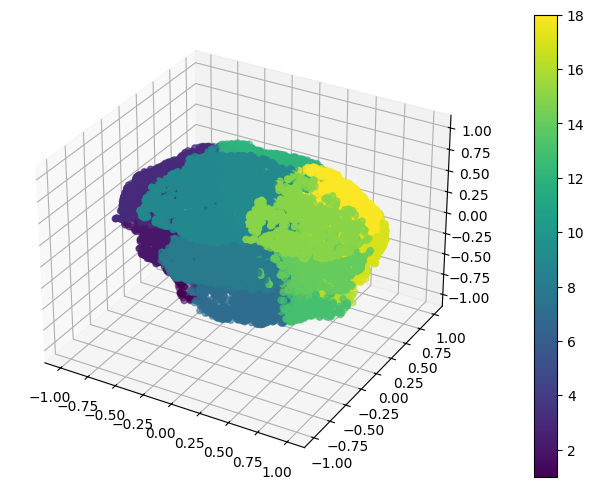

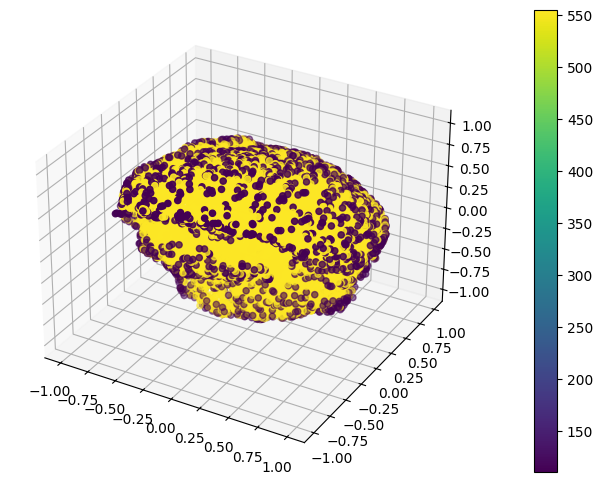

In [6]:
max_radius = 0.1
nn = 10

name_mesh="cancer_tissue"
#--------------------------------------------------------------------

# # Get discrete system
start_time = time.time()
tag_in=111
tag_out=999
beta_value = 0.001 # Neuman for tissue
p0_value=0

nREV=8
coord=meshQ.coordinates()
create_mesh_Delaunay(name_mesh, coord)


meshV, Q_markers, V_markers, REV_markers_t = get_mesh(name_mesh,ind_bound,n_div_x,n_div_y,n_div_z,x,y,z)

tag_T=111

AD, M, b, W, T = get_system(meshV, K_x, K_y, K_z, C, mu_bl_up, beta_value,p0_value,x,y,z)


print("\n------------------ System setup and assembly time: ", time.time() - start_time, "\n")





Dirichelt boundary condition for the capillary network

In [89]:
def points_in_sphere(points, center, radius):
    distances = np.linalg.norm(points - center, axis=1)
    points_in_sphere = distances <= radius
    return points_in_sphere

In [90]:
np.random.seed(42)

radius=0.2

coord_V=meshQ.coordinates()

value_BOUND = np.zeros(len(ind_bound),)
flag=np.zeros(np.shape(ind_bound))

inlet_value=p_in
outlet_value=p_out
possible_out=np.where(flag==0)[0]

while len(possible_out)>int(len(ind_bound)/2):
    value = np.random.randint(0, len(possible_out)-1)
    # print(value)
    # print(len(possible_out))
    chosen_ind=ind_bound[possible_out[value]]
    # print(possible_out)
    # print(chosen_ind)
    flag[possible_out[value]]=1
    center=coord_V[chosen_ind]
    value_BOUND[possible_out[value]]=inlet_value
    sphere_flag=points_in_sphere(coord_V[ind_bound],center,radius)
    sphere_index=np.where(sphere_flag==1)[0]
    for i in sphere_index:
        if value_BOUND[i]==0:
            dist=np.linalg.norm(center-coord_V[ind_bound][i])
            value_BOUND[i]=inlet_value * np.exp(-dist*2)
            flag[i]=1
    possible_out=np.where(flag==0)[0]

print(len(possible_out))
possible_out=np.where(flag==0)[0]
while len(possible_out)!=0:
    value = np.random.randint(0, len(possible_out)-1)
    # print(value)
    # print(len(possible_out))
    chosen_ind=ind_bound[possible_out[value]]
    # print(possible_out)
    # print(chosen_ind)
    flag[possible_out[value]]=1
    center=coord_V[chosen_ind]
    value_BOUND[possible_out[value]]=outlet_value
    sphere_flag=points_in_sphere(coord_V[ind_bound],center,radius)
    sphere_index=np.where(sphere_flag==1)[0]
    for i in sphere_index:
        if value_BOUND[i]==0:
            dist=np.linalg.norm(center-coord_V[ind_bound][i])
            value_BOUND[i]=outlet_value * np.exp(dist*2)
            flag[i]=1

    possible_out=np.where(flag==0)[0]


print(value_BOUND)


1087
[5890.42288768 2070.24406306 2841.45411156 ... 2355.49417581 2060.66194177
 2495.94149889]


In [25]:
print(inlet_value * np.exp(-0.2*3))
print(outlet_value * np.exp(0.2*3))

3292.8698165641586
3644.237600781018


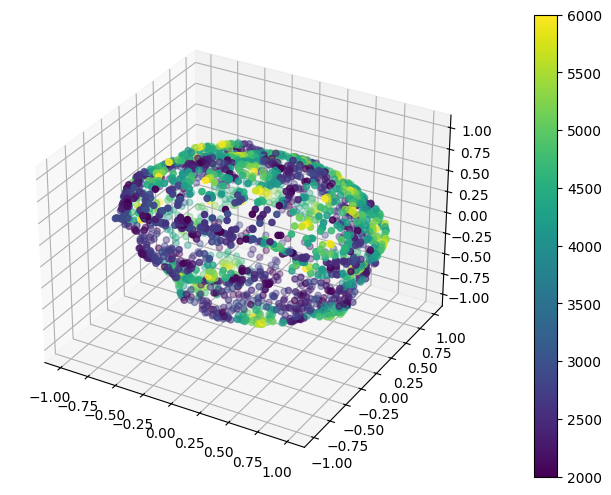

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter_plot=ax.scatter(coord_V[ind_bound,0],coord_V[ind_bound,1],coord_V[ind_bound,2],c=value_BOUND)
cbar = fig.colorbar(scatter_plot, ax=ax, pad=0.1)
plt.title("Dirichlet boundary condition for the capillary")

Application of the Dirichlet boundary condition for the capillary

In [92]:

V = FunctionSpace(meshV, 'CG', 1)
coord_mesh=meshQ.coordinates()

# Define the boundary conditions
coord_boundary =coord_mesh[ind_bound]  # Array of boundary point coordinates
value_boundary_point = value_BOUND  # Array of boundary values for each point

# Create an empty list to store Dirichlet boundary conditions
bc_in = []

# Loop over the boundary points and their values to create the Dirichlet BCs
count=0
for coord, value in zip(coord_boundary, value_boundary_point):
    print(count)
    bc_in.append(DirichletBC(V, value, f"near(x[0], {coord[0]}) && near(x[1], {coord[1]}) && near(x[2], {coord[2]})",method='pointwise'))
    count=count+1

# Assemble the boundary conditions
bcs = block_bc([bc_in, []], True)
print('ok')
# Apply the boundary conditions
bcs.apply(T).apply(b)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

[[<dolfin.fem.dirichletbc.DirichletBC at 0x7f062e28ce30>,
  ...],
 []]

Solving the Linear System

KSP Object: 1 MPI process
  type: gmres
    restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
    happy breakdown tolerance 1e-30
  maximum iterations=10000, initial guess is zero
  tolerances:  relative=1e-15, absolute=1e-50, divergence=10000.
  right preconditioning
  using DEFAULT norm type for convergence test
PC Object: 1 MPI process
  type: ilu
  PC has not been set up so information may be incomplete
    out-of-place factorization
    0 levels of fill
    tolerance for zero pivot 2.22045e-14
    matrix ordering: natural
    matrix solver type: petsc
    matrix not yet factored; no additional information available
  linear system matrix = precond matrix:
  Mat Object: 1 MPI process
    type: seqaij
    rows=36186, cols=36186
    total: nonzeros=1181020, allocated nonzeros=1181020
    total number of mallocs used during MatSetValues calls=0
      not using I-node routines
iterations =  60
residual =  1.70e-10
converge reason =  2


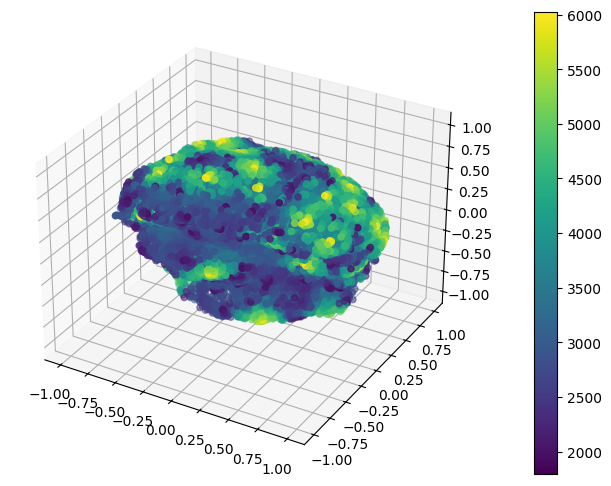

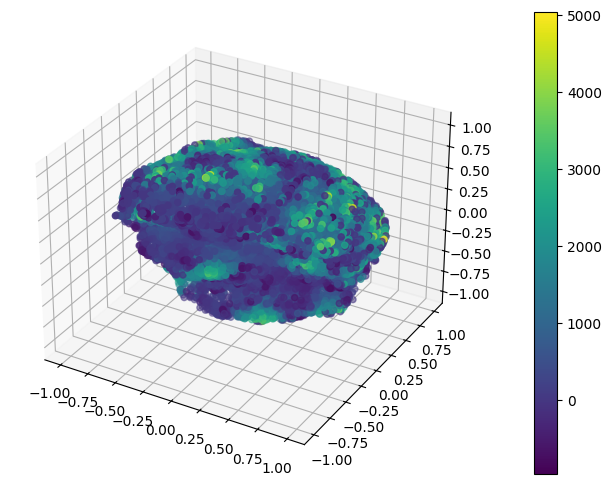

In [93]:

b_PET = ii_convert(b)
shape = b_PET.size()  
A_PET = ii_convert(T).mat()
b_PET = b_PET.vec()
u     = np.zeros((shape))
tol   = 1e-15
u_PET = PETSc.Vec().createWithArray(u)

# Create a PETSc Krylov solver
solver = PETSc.KSP().create()
solver.setOperators(A_PET)
solver.setType(PETSc.KSP.Type.GMRES)  # <--Choose the solver type
solver.setFromOptions()  # <--Allow setting options from the command line or a file
solver.setTolerances(rtol=tol)
solver.setPCSide(1)
solver.view()

# Set preconditioner
pc = solver.getPC()
#pc.setType(PETSc.PC.Type.HYPRE)
#pc.setHYPREType("boomeramg")  # Set to use AMG
pc.setType(PETSc.PC.Type.ILU)
#c.setType(PETSc.PC.Type.NONE)
#pc.setType(PETSc.PC.Type.JACOBI)


solver.solve(b_PET, u_PET)

# print
print ('iterations = ',               solver.getIterationNumber())
print ('residual = ', '{:.2e}'.format(solver.getResidualNorm()))#  %.2E
print ('converge reason = ',          solver.getConvergedReason())
print ('residuals at each iter = ',   solver.getConvergenceHistory())
#print ('precond type', pc.getType())
# Print solver information
num_iter = solver.getIterationNumber()
print(f"Number of iterations: {num_iter}")

print("\n------------------  System solved time: ", time.time() - start_time, "\n")


#Saving the results
Q = FunctionSpace(meshV, 'CG', 1)
dimQ= Q.dim()

pcap_pet_Q = u_PET[:dimQ]
pt_pet_Q = u_PET[dimQ:]

print(np.shape(pcap_pet_Q))
print(np.shape(pt_pet_Q))


p_cap=Function(Q)
p_t=Function(Q)


p_cap.vector()[:]=pcap_pet_Q
p_t.vector()[:]=pt_pet_Q
coord_V=meshV.coordinates()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter_plot=ax.scatter(coord_V[:,0],coord_V[:,1],coord_V[:,2],c=p_cap.compute_vertex_values(meshV))
cbar = fig.colorbar(scatter_plot, ax=ax, pad=0.1)
plt.title('Capillary Pressure (Pa)')

coord_V=meshV.coordinates()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter_plot=ax.scatter(coord_V[:,0],coord_V[:,1],coord_V[:,2],c=p_t.compute_vertex_values(meshV))
cbar = fig.colorbar(scatter_plot, ax=ax, pad=0.1)
plt.title('Tissue Pressure (Pa)')


In [94]:
#Saving

File(f'{dir_results}/FINAL_RESULTS/TOTAL/MARKERS/meshtotal.pvd') << meshV
File(f'{dir_results}/FINAL_RESULTS/TOTAL/PETSC/pcap_total_case.pvd') << p_cap
File(f'{dir_results}/FINAL_RESULTS/TOTAL/PETSC/pt_total_case.pvd') << p_t